In [20]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from math import sqrt  # for root mean-squared error calculation


# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())




In [21]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)



General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None

Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      

In [22]:
#median value at 21.2 

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)


In [23]:
#the effects of air pollution on housing prices 


In [24]:

boston_y = boston['nox'].values


boston_x = boston['mv'].values.reshape(-1,1)

boston_z = boston.tax

reg = sklearn.linear_model.LinearRegression()

In [33]:
def plot_learning_curves (model, X, Y):
#split data into trainig and testing data
    x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size = 0.2)

    train_errors, val_errors = [],[]
    
    for m in range (1, (len(X_train))):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r+-", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b+-", linewidth = 3, label = "val")
line_reg = reg.fit(x_train,y_train)

plot_learning_curves(lin_reg,x,y)

NameError: name 'lin_reg' is not defined

/Users/areej/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


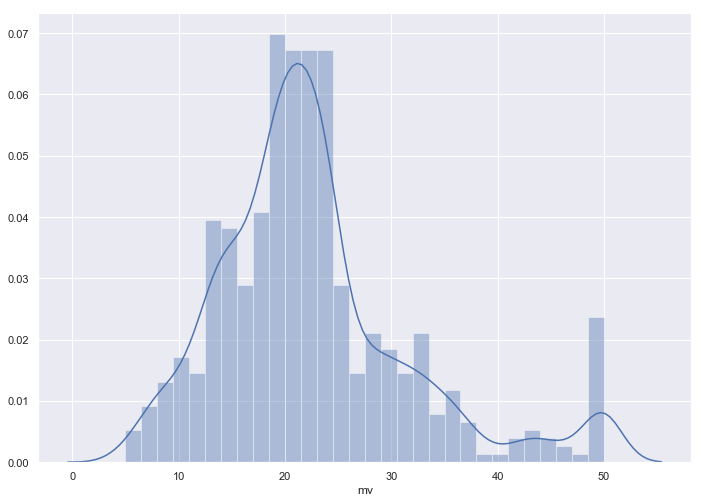

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

X = boston.mv
Y = boston.nox

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(X, bins=30)
plt.show()

#pretty much a normal distribution besides some outliers on the housing averages, lets compare that with the 
#NOX variable.



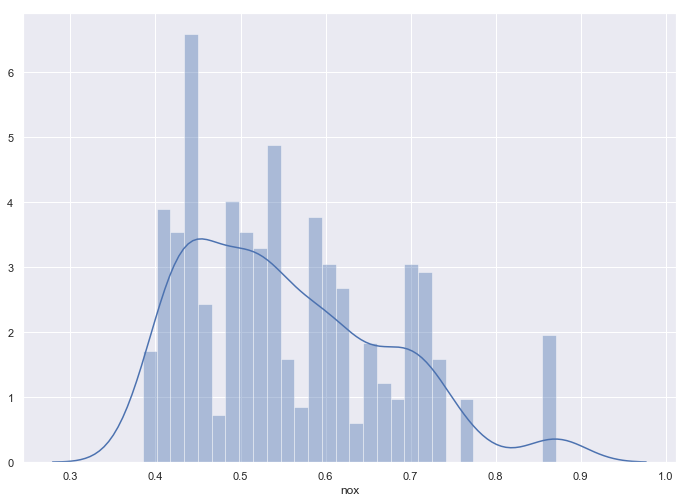

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()



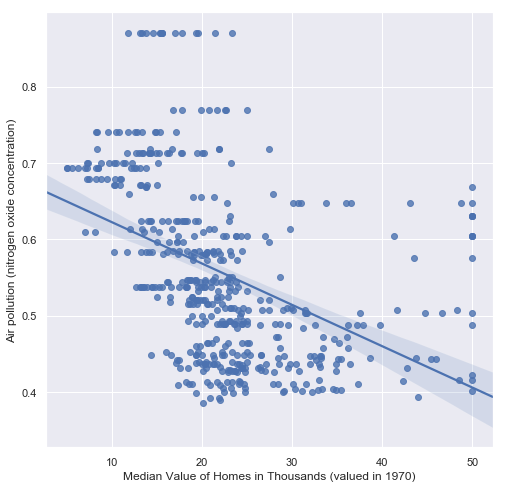

In [38]:
plt.figure(figsize = (8,8))

sns.regplot(boston_x, boston_y)

plt.xlabel("Median Value of Homes in Thousands (valued in 1970)")
plt.ylabel ("Air pollution (nitrogen oxide concentration)")
plt.show()

#negative correlation



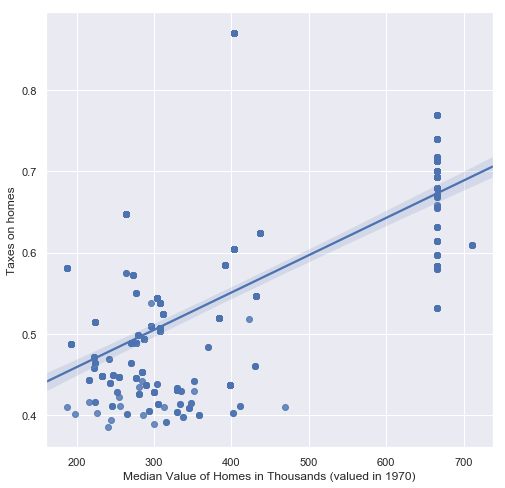

In [37]:
plt.figure(figsize = (8,8))

sns.regplot( boston_z, boston_y)
plt.xlabel("Median Value of Homes in Thousands (valued in 1970)")
plt.ylabel ("Taxes on homes" )
plt.show()

#positive correlations 

In [ ]:
#Overall the as the air pollution decreases the prices of the homes are increasing.
#This makes sense because the air pollution would not allow for many the value of the house to be expensive another thing
#to explore is to see if the tax rate varries with the air pollution


In [ ]:
# Employ at least two regression modeling methods selected from those discussed in Chapter 4 of 
#the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. 
#Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as 
#an index of prediction error.